In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/nigeria_crop_yield.csv')
items = df['Item'].unique()
print("Crops in Nigeria:\n")
for index, item in enumerate(items):
    print(index+1, item)


Crops in Nigeria:

1 Bananas
2 Carrots and turnips
3 Cashew nuts, in shell
4 Cassava, fresh
5 Chillies and peppers, dry (Capsicum spp., Pimenta spp.), raw
6 Chillies and peppers, green (Capsicum spp. and Pimenta spp.)
7 Cocoa beans
8 Coconuts, in shell
9 Coffee, green
10 Cow peas, dry
11 Fonio
12 Ginger, raw
13 Green corn (maize)
14 Green garlic
15 Groundnuts, excluding shelled
16 Karite nuts (sheanuts)
17 Kenaf, and other textile bast fibres, raw or retted
18 Kola nuts
19 Maize (corn)
20 Mangoes, guavas and mangosteens
21 Melonseed
22 Millet
23 Natural rubber in primary forms
24 Oil palm fruit
25 Okra
26 Onions and shallots, dry (excluding dehydrated)
27 Onions and shallots, green
28 Other citrus fruit, n.e.c.
29 Other fibre crops, raw, n.e.c.
30 Other fruits, n.e.c.
31 Other nuts (excluding wild edible nuts and groundnuts), in shell, n.e.c.
32 Other oil seeds, n.e.c.
33 Other pulses n.e.c.
34 Other stimulant, spice and aromatic crops, n.e.c.
35 Other vegetables, fresh n.e.c.
36 Papay

In [9]:
print('\n', df.head(), '\n')
print('\n', df.info(), '\n')


                   Item  Year  area_harvested_ha  production_tonnes  \
0              Bananas  2020           476070.0         5583830.00   
1              Bananas  2021           525177.0         7388610.00   
2              Bananas  2022           540537.0         8015978.46   
3              Bananas  2023           566568.0         7308103.18   
4  Carrots and turnips  1961            20000.0          150000.00   

   yield_kg_ha  avg_temp_c  avg_rain_mm  
0      11729.0       27.92       1251.8  
1      14068.8       28.01       1049.9  
2      14829.7       28.17       1131.6  
3      12898.9       28.05       1289.4  
4       7500.0       26.67       1107.1   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Item               2940 non-null   object 
 1   Year               2940 non-null   int64  
 2   area_harvested_ha  2

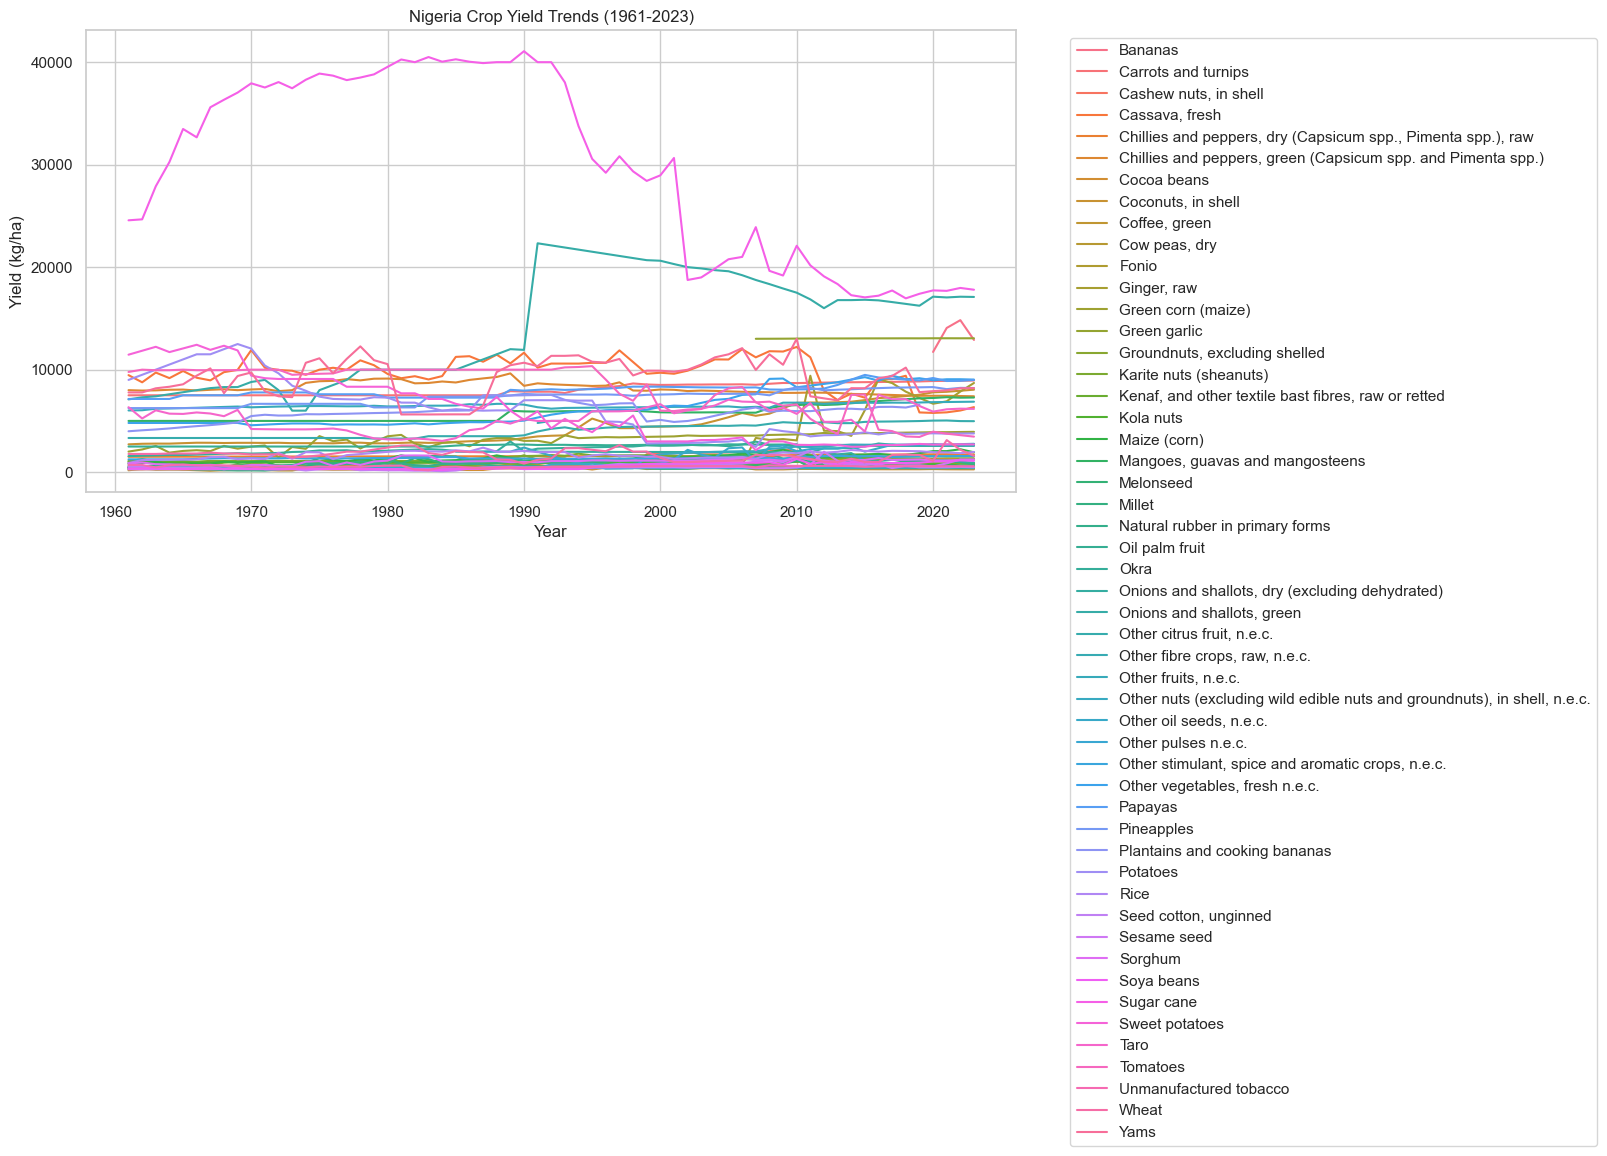

In [10]:
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='yield_kg_ha', hue='Item')

plt.title("Nigeria Crop Yield Trends (1961-2023)")
plt.ylabel("Yield (kg/ha)")
plt.xlabel("Year")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

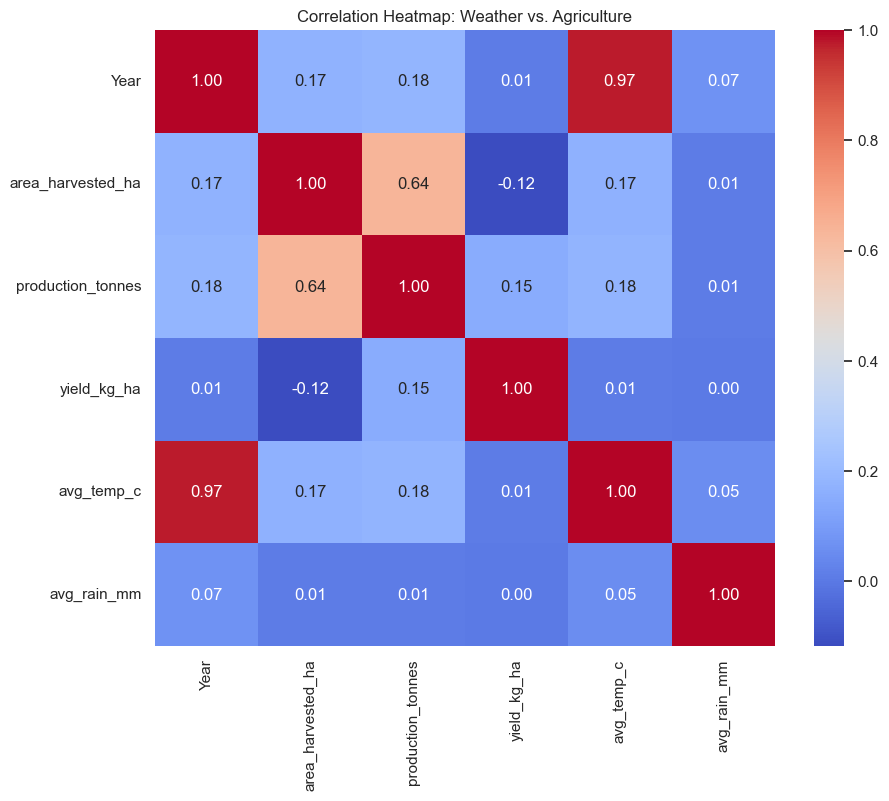

In [11]:
# correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: Weather vs. Agriculture")
plt.show()

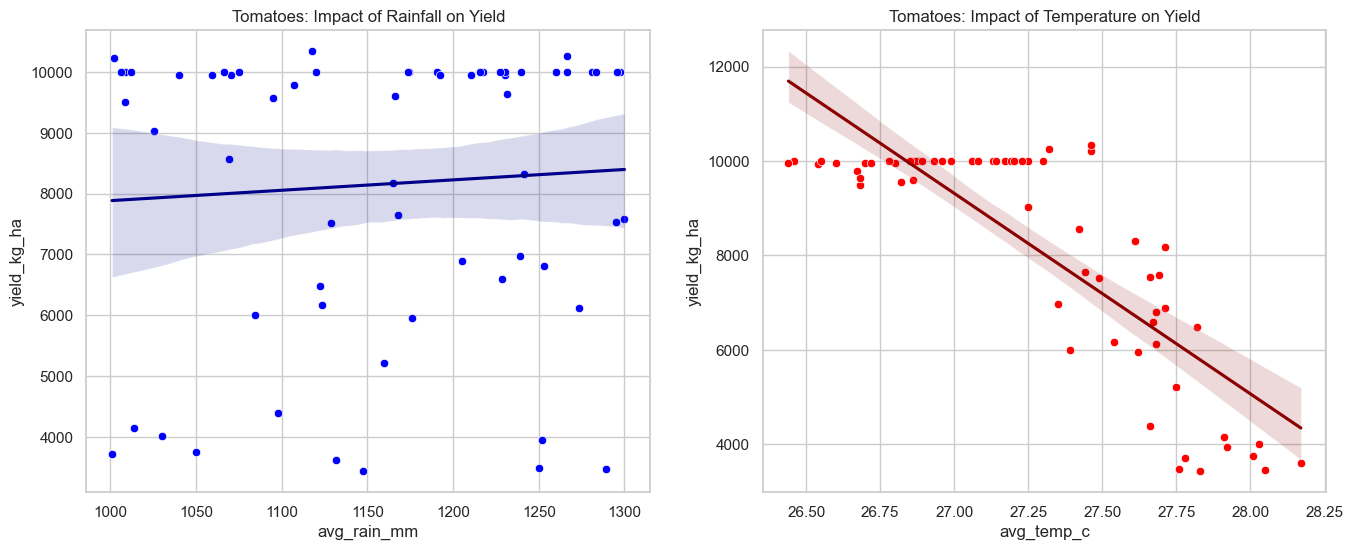

In [24]:
# major crop to analyze specifically (e.g., Maize or Tomatoes)
# target_crop = 'Maize (corn)'
target_crop = 'Tomatoes'
# target_crop = 'Yams'
crop_data = df[df['Item'] == target_crop]

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
# Plot 1: Rain vs Yield
sns.scatterplot(data=crop_data, x='avg_rain_mm', y='yield_kg_ha', ax=axes[0], color='blue')
sns.regplot(data=crop_data, x='avg_rain_mm', y='yield_kg_ha', ax=axes[0], scatter=False, color='darkblue')
axes[0].set_title(f'{target_crop}: Impact of Rainfall on Yield')

# Plot 2: Temp vs Yield
sns.scatterplot(data=crop_data, x='avg_temp_c', y='yield_kg_ha', ax=axes[1], color='red')
sns.regplot(data=crop_data, x='avg_temp_c', y='yield_kg_ha', ax=axes[1], scatter=False, color='darkred')
axes[1].set_title(f'{target_crop}: Impact of Temperature on Yield')

plt.show()


In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import joblib

df = pd.read_csv('../data/nigeria_crop_yield.csv')

X = df.drop(columns=['yield_kg_ha', 'production_tonnes'])
y = df['yield_kg_ha']

X = pd.get_dummies(X, columns=['Item'], prefix='Crop')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5
)

print("🚀 Training XGBoost...")
model.fit(X_train, y_train)
print("✅ Training Complete.")

predictions = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Training Data Shape: (2352, 55)
Test Data Shape: (588, 55)
🚀 Training XGBoost...
✅ Training Complete.
Root Mean Squared Error (RMSE): 707.63
R² Score: 0.98
